In [16]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
import utils

# Fetal Health Classification
Portfolio demo project, using the Fetal Health Classification data set from Kaggle. The data was taken from Cardiotocogram (CTG) readings, which measure fetal heartrate (FHR) and uterine contractions (UCs). Each sample was classified by experts as normal/1 (fetus in good health), suspect/2 (fetus may not be in good health) or pathological/3 (readings indicate fetus is not in good health). Readings were collected anywhere from 48 hours before birth and up to 30 minutes after birth.

# Feature Descriptions
|Feature Name                                          |Description                                            |
|------------------------------------------------------|-------------------------------------------------------|
|baseline value                                        |FHR baseline (beats per minute)                        |
|accelerations                                         |Number of accelerations per second                     |
|fetal_movement                                        |Number of fetal movements per second                   |
|uterine_contractions                                  |Number of uterine contractions per second              |
|light_decelerations                                   |Number of light decelerations per second               |
|severe_decelerations                                  |Number of severe decelerations per second              |
|prolongued_decelerations                              |Number of prolonged decelerations per second           |
|abnormal_short_term_variability                       |Percentage of time with abnormal short term variability|
|mean_value_of_short_term_variability                  |Mean value of short term variability                   |
|percentage_of_time_with_abnormal_long_term_variability|Percentage of time with abnormal long term variability |
|mean_value_of_long_term_variability                   |Mean value of long term variability                    |
|histogram_width                                       |Width of FHR histogram                                 |
|histogram_min                                         |Minimum (low frequency) of FHR histogram               |
|histogram_max                                         |Maximum (high frequency) of FHR histogram              |
|histogram_number_of_peaks                             |Number of histogram peaks                              |
|histogram_number_of_zeroes                            |Number of histogram zeros                              |
|histogram_mode                                        |Histogram mode                                         |
|histogram_mean                                        |Histogram mean                                         |
|histogram_median                                      |Histogram median                                       |
|histogram_variance                                    |Histogram variance                                     |
|histogram_tendency                                    |Histogram tendency                                     |

In [4]:
"""
The column names are long and unweildy, so the first thing I would like
to do is rename them to something shorter but still meaningful.
"""
df = pd.read_csv("fetal_health.csv")
print(list(df.columns.values))
cols = ["bpm","accel","movement","contractions","light_decel","severe_decel",
        "long_decel","abnormal_short_var_pct","short_var_mean","abnormal_long_var_pct",
        "long_var_mean","fhr_width","fhr_min","fhr_max","fhr_peaks","fhr_zeros",
        "fhr_mode","fhr_mean","fhr_median","fhr_var","tendency","fetal_health"]
df.columns = cols
df.to_csv("data.csv", index=False)

['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']


In [15]:
"""
With the new column names, now I want to look at the class distributions,
as well as some of the metadata.
"""
df = pd.read_csv("data.csv")
print(pd.DataFrame({"count": df["fetal_health"].value_counts(), 
                    "proportion": df["fetal_health"].value_counts(normalize=True)}))

print(df.info())

              count  proportion
fetal_health                   
1.0            1655    0.778457
2.0             295    0.138758
3.0             176    0.082785
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bpm                     2126 non-null   float64
 1   accel                   2126 non-null   float64
 2   movement                2126 non-null   float64
 3   contractions            2126 non-null   float64
 4   light_decel             2126 non-null   float64
 5   severe_decel            2126 non-null   float64
 6   long_decel              2126 non-null   float64
 7   abnormal_short_var_pct  2126 non-null   float64
 8   short_var_mean          2126 non-null   float64
 9   abnormal_long_var_pct   2126 non-null   float64
 10  long_var_mean           2126 non-null   float64
 11  fhr_width               2126 non-null  

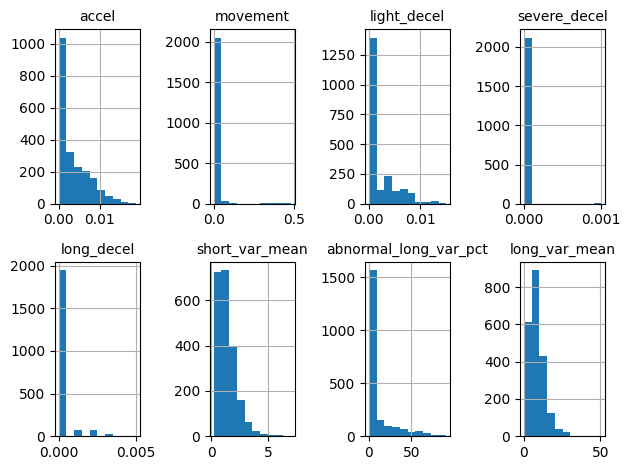

In [25]:
"""
From the output above, we can see the a large majority (77.85%) of samples
are from healthy fetuses, while only 13.88% are from suspect fetuses and
even less (8.28%) are pathological. This is expected, as most fetuses would
be in the normal range, hence why it is normal. While only a few would be
outside of that range.

When splitting our data later on, we will need to be careful with class
distribution. That is, train/validation/test sets should have similar
distributions of the class labels.

We can also see that all the values are floats and none of them are missing.
What we can do next is look at some distributions, and try to find any
abnormal feature distributions.
"""
df = pd.read_csv("data.csv")
# for c in df.columns.values:
#     if c == "fetal_health":
#         continue
#     utils.hist_prob_plots(df, c)
"""
After running the lines above I selected only the features with abnormalities
to display. Uncomment the top part to see all graphs.
"""
cols = ["accel","movement","light_decel","severe_decel","long_decel",
        "short_var_mean","abnormal_long_var_pct","long_var_mean"]
utils.hist_matrix(df, cols, 2, 4)


Fetal Health 1.0


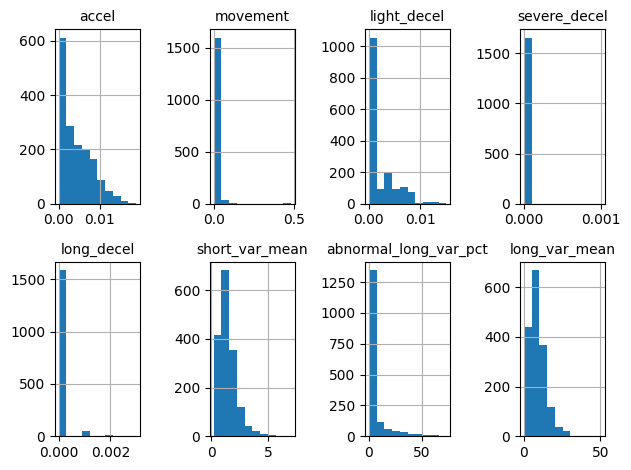

Fetal Health 2.0


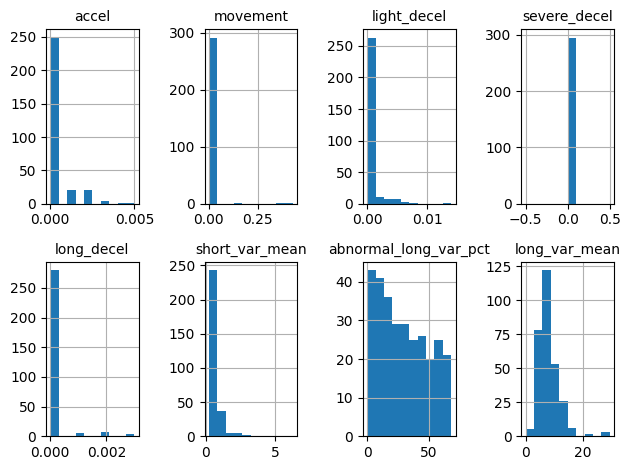

Fetal Health 3.0


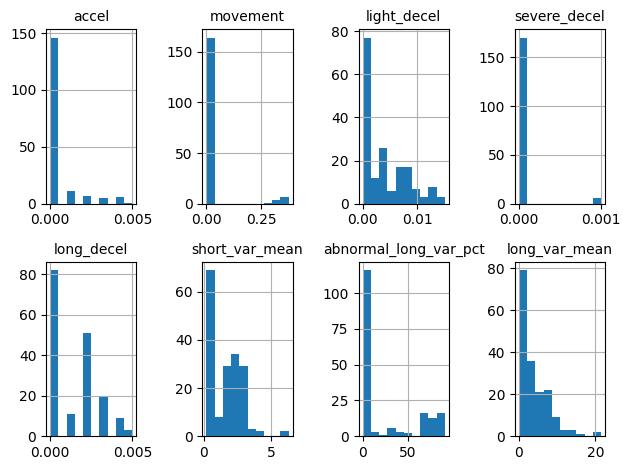

In [27]:
"""
We can see the features above are heavily right-skewed. We can take a look
at the distributions per class label, to see if there is some underlying
pattern that explains this.
"""
df = pd.read_csv("data.csv")
cols = ["accel","movement","light_decel","severe_decel","long_decel",
        "short_var_mean","abnormal_long_var_pct","long_var_mean"]
classes = [1.0,2.0,3.0]

for c in classes:
    data = df[df["fetal_health"] == c]
    print(f"Fetal Health {c}")
    utils.hist_matrix(data, cols, 2, 4)